# Mathematical Underpinnings - Lab 1

### Jakub Szypuła

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 2.59859296, -0.39738171],
        [ 1.31806545,  0.86547139],
        [-0.6437569 , -0.49032211],
        [ 0.58001857,  2.12206796],
        [ 1.62144852,  0.55331607]]),
 array([1, 0, 1, 1, 1]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
Y_generative = np.append(np.ones(500), np.ones(500)*(-1))
X_generative = np.append(np.random.multivariate_normal(m1, sigma, 500), np.random.multivariate_normal(m2, sigma, 500), axis=0)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


$$ p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)}$$

Where:

$$ p(x) = p(x|y=1)p(y=1) + p(x|y=-1)p(y=-1)$$

We know that $p(y=1) = p(y=-1) = 0.5$ and that $ p(x|y=1) \sim \mathcal {N}(\mu_1, \sigma)$ and that $ p(x|y=-1) \sim \mathcal {N}(\mu_2, \sigma)$.

$$ p(y=1|x) = \frac{p(x|y=1)0.5}{p(x|y=1)0.5+p(x|y=-1)0.5} = \frac{p(x|y=1)}{p(x|y=1)+p(x|y=-1)} = \frac{p(x|y=1)/p(x|y=-1)}{p(x|y=1)/p(x|y=-1) + 1} $$

$$ p(x|y=1) = (2\pi)^{-d/2} \det(\Sigma)^{-d/2}exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2) $$

$$ p(x|y=-1) = (2\pi)^{-d/2} \det(\Sigma)^{-d/2}exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2) $$

Let's look at the nominator.

$$ p(x|y=1)/p(x|y=-1) = \frac{(2\pi)^{-d/2} \det(\Sigma)^{-d/2}exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2)}{(2\pi)^{-d/2} \det(\Sigma)^{-d/2}exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2)} = $$

$$ = \frac{exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2)}{exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2)} = exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2 + (x-m_2)'\Sigma^{-1}(x-m_2)/2) = (1)$$

Keep in mind that $\Sigma$ is symmetric and that $x'\Sigma^{-1}m_1 = m_1'\Sigma^{-1}x$
$$ exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2) = exp((-x'\Sigma^{-1}x + x'\Sigma^{-1}m_1 + m_1'\Sigma^{-1}x - m_1'\Sigma^{-1}m_1)/2) = \exp(-x'\Sigma^{-1}x/2 + x'\Sigma^{-1}m_1 - m_1'\Sigma^{-1}m_1/2) $$

$$ (1) = exp(-x'\Sigma^{-1}x/2 + x'\Sigma^{-1}m_1 - m_1'\Sigma^{-1}m_1/2 + x'\Sigma^{-1}x/2 - x'\Sigma^{-1}m_2 - m_2'\Sigma^{-1}m_2/2)  = exp(x'\Sigma^{-1}m_1 - m_1'\Sigma^{-1}m_1/2 - x'\Sigma^{-1}m_2 + m_2'\Sigma^{-1}m_2/2)$$

Thus:

$$ \beta_0 = m_2'\Sigma^{-1}m_2/2 - m_1'\Sigma^{-1}m_1/2, \beta = \Sigma^{-1}(m_1-m2) $$

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [5]:
# computing beta_0 and beta using the formulas
# since \pi = 0.5 then log \pi(1-\pi) = log(1) = 0 so I skipped this for simplicity
beta_0 = np.dot(np.dot(m2.transpose(), np.linalg.inv(sigma)), m2)/2 - np.dot(np.dot(m1.transpose(), np.linalg.inv(sigma)), m1)/2
beta = np.dot(np.linalg.inv(sigma),(m1-m2))

In [8]:
# a logistic model
mod_a = LogisticRegression(penalty='none')
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.17999474]), array([[2.14867137, 2.105641  ]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [14]:
# sampling
n = 1000
x1 = np.random.multivariate_normal(m1, sigma, n)
x2 = np.random.multivariate_normal(m2, sigma, n)
mixture_coef = np.random.binomial(1, 0.5, n)
X_discriminative = np.vstack((x1[mixture_coef == 0,:], x2[mixture_coef == 1,:]))
probability_y = 1/(1+np.exp(-(-2 + np.dot(X_discriminative, np.array([2,2])))))
Y_discriminative = np.random.binomial(1, probability_y, n)

In [15]:
mod_b = LogisticRegression(penalty='none')
mod_b.fit(X_discriminative, Y_discriminative)
mod_b.coef_

array([[1.97223557, 1.98108835]])

Not that far off.


#### Second bullet point

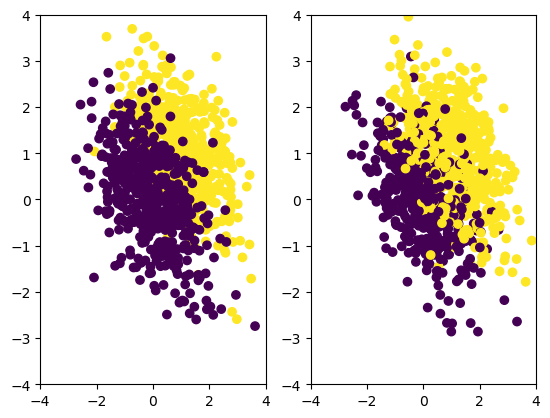

In [16]:
plt.subplot(1, 2, 1)
plt.scatter(x=X_generative[:,0], y=X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(x=X_discriminative[:,0],y=X_discriminative[:,1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

$$ p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1)+(1-\pi) p(x|y=-1)} $$

$$ p(x|y=-1) = \frac{\pi p(x|y=1)(1-p(y=1|x))}{p(y=1|x)(1-\pi)} = \frac{\pi exp(-x)(1-\frac{1}{(1+exp(-\beta_0-\beta_1 x))})}{\frac{1}{(1+exp(-\beta_0-\beta_1 x))}(1-\pi)} = \frac{\pi exp(-x)(\frac{exp(-\beta_0-\beta_1 x)}{(1+exp(-\beta_0-\beta_1 x))})}{\frac{1}{(1+exp(-\beta_0-\beta_1 x))}(1-\pi)} = \frac{\pi exp(-x)(exp(-\beta_0-\beta_1 x))}{(1-\pi)} = $$

$$ = \frac{\pi exp(-\beta_0)}{1-\pi}exp(-(\beta_1+1)x) = C_{\beta_0,\pi}exp(-(\beta_1+1)x) $$

$$ C_{\beta_0,\pi} = \frac{\pi exp(-\beta_0)}{1-\pi} (*)$$

Since $X$ given $Y = -1$ has an exponential distribution with $\lambda = \beta_1+1$ and $\int_{0}^{\infty}p(x|y=-1)dx = 1$. Also note that $\int_{0}^{\infty} e^{-ax} dx = \frac{1}{a} $ for $a>0$. So:

$$ \int_{0}^{\infty}p(x|y=-1)dx = 1 \\
\int_{0}^{\infty}C_{\beta_0,\pi} e^{-(\beta_1+1)x}dx = 1 \\
\int_{0}^{\infty} e^{-(\beta_1+1)x}dx = \frac{1}{C_{\beta_0,\pi}} \\
\frac{1}{(\beta_1+1)} = \frac{1}{C_{\beta_0,\pi}} \\
C_{\beta_0,\pi} = (\beta_1+1)
$$

Knowing that and that $(*)$ we can conclude that:

$$ \frac{\pi exp(-\beta_0)}{1-\pi} = (\beta_1+1) $$

$$ exp(\beta_0) = \frac{\pi}{(1-\pi)(\beta_1+1)} $$

$$ \beta_0 = log( \frac{\pi}{(1-\pi)(\beta_1+1)} ) $$

Let's calculate it for fixed values. Since $n_1=1000, n_2 = 2000$ then $\pi = 1/3$ and $\frac{\pi}{1-\pi} = \frac{1}{2}$. $\beta_1 =1$ so $\beta_0 = log(\frac{1}{2*(1+1)}) = -log(4)$

In [17]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [26]:
# a model
mod = LogisticRegression(penalty='none')
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.46619323]), array([[1.11391982]]))

In [30]:
-np.log(4)

-1.3862943611198906

In [20]:
# a numeric answer to the question about beta0
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c)/pi_c * (beta1 + 1))

-1.3862943611198908

Q1: $f_{X|Y=-1} \sim Exp(\beta_1+1)$

Q2: No, because the intercept depends on $\beta_1$ too.

Q3: It is not uniquely determined because it also depends on $\pi$.

## Task 2

### a)

In our task we know $a^* = 1$.

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - (X+\epsilon))^2 = \mathbb{E}((a-1)X - \epsilon)^2 = \mathbb{E}((a-1)X)^2+\mathbb{E}(2(a-1)X\epsilon)+\mathbb{E}(\epsilon)^2 = (1)$,

Because $\mathbb{E} \epsilon=0$ and it is independent of $X$ we can skip the middle term. Also $Var\epsilon = E\epsilon^2 - (E\epsilon)^2 = \sigma^2 - 0^2 = \sigma^2$. Thus:


$ (1) = (a-1)^2\mathbb{E}X^2+\sigma^2 = (a-1)^2 + \sigma^2$ because $Var(X) = \mathbb{E}X^2 - (\mathbb{E}X^)2$ and also $Var(X) = 1, E(X) = 0$.

In [268]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps # assuming it is \sigma^2

Minimal value of the population risk function is of course for $a=1$ and it is equal $sigma^2$ so with changing sigma the minimum also changes. 

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)